<a href="https://colab.research.google.com/github/Jitendar786/Vegetable-Classification-Model/blob/main/AI_MSE_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   vitamin_a  vitamin_c     fiber   type
0  70.783510  35.779827  8.313735   root
1  54.353822  49.421245  5.989785  fruit
2   8.172535  82.824925  1.149330  fruit
3  45.830064  33.520805  0.938573  leafy
4  48.469629  17.376159  9.096268   root

Enter the nutritional values for the vegetable:
Enter Vitamin A content (in micrograms): 45
Enter Vitamin C content (in milligrams): 33
Enter Fiber content (in grams): 0.9

Predicted Classification: leafy


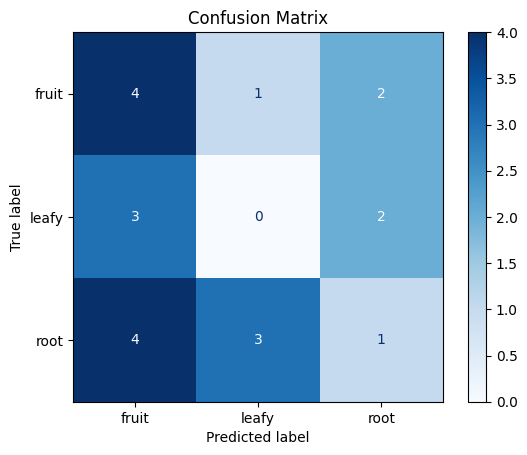

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data (adjust path as needed)
df = pd.read_csv('vegetables.csv')  # Replace with your actual file path

# Show the first few rows of the data to understand its structure
print(df.head())

# Preprocessing: Drop non-numerical columns (in this case, 'type' is the target column)
X = df.drop(['type'], axis=1)  # Features (nutrition: vitamin_a, vitamin_c, fiber)
y = df['type']  # Target (vegetable category)

# Ensure all columns are numeric, convert if necessary
X = X.apply(pd.to_numeric, errors='coerce')

# Handle missing values (if any)
if X.isnull().sum().any():
    X = X.fillna(X.mean())  # Filling missing values with the mean of each column

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model: Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Function to display confusion matrix
def plot_confusion_matrix():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

    # Plot confusion matrix using a heatmap
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap='Blues', values_format='d')
    plt.title("Confusion Matrix")
    plt.show()

# Function to take user input and predict the classification of the vegetable
def get_user_input_and_predict():
    # Accepting user input for the nutritional values
    print("\nEnter the nutritional values for the vegetable:")

    try:
        vitamin_a = float(input("Enter Vitamin A content (in micrograms): "))
        vitamin_c = float(input("Enter Vitamin C content (in milligrams): "))
        fiber = float(input("Enter Fiber content (in grams): "))
    except ValueError:
        print("Invalid input. Please enter numeric values.")
        return

    # Create a DataFrame for the new input
    new_data = pd.DataFrame({
        'vitamin_a': [vitamin_a],
        'vitamin_c': [vitamin_c],
        'fiber': [fiber]
    })

    # Standardize the new data using the same scaler as the training data
    new_data_scaled = scaler.transform(new_data)

    # Predict the class for the new vegetable
    new_prediction = model.predict(new_data_scaled)
    print(f"\nPredicted Classification: {new_prediction[0]}")

    # Plot confusion matrix after the user input and classification
    plot_confusion_matrix()

# Call the function to get user input and predict
get_user_input_and_predict()
